<a href="https://colab.research.google.com/github/kandapatrick/Canny/blob/master/lineareg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

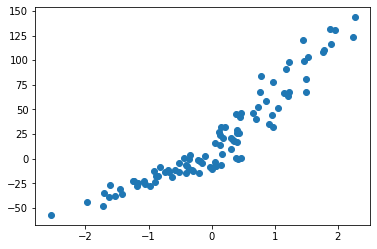

In [2]:
np.random.seed(0) # allow to do aléatoire

x, y = make_regression(n_samples=100, n_features=1, noise = 10) # creation of the  dataset (x, y) linéaire
y = y + abs(y/2) # modifying the value of y to make the dataset non-linéaire

plt.scatter(x, y) # result of. x in abscisse and y in ordor 

In [4]:
# Verification of the dimensions
print(x.shape)
print(y.shape)

# redimen y
y = y.reshape(y.shape[0], 1)
print(y.shape)

(100, 1)
(100,)
(100, 1)


In [5]:
# Creation of the matric X, in the Biais
X = np.hstack((x, np.ones(x.shape)))
X = np.hstack((x**2, X)) # add vector x^2 at the left of the matrice X

print(X.shape)
print(X[:10])

(100, 3)
[[ 0.12927848 -0.35955316  1.        ]
 [ 0.95382381  0.97663904  1.        ]
 [ 0.1618788   0.40234164  1.        ]
 [ 0.66120688 -0.81314628  1.        ]
 [ 0.78816353 -0.88778575  1.        ]
 [ 0.19701457  0.44386323  1.        ]
 [ 0.95507205 -0.97727788  1.        ]
 [ 0.18346819  0.42833187  1.        ]
 [ 0.04337847  0.20827498  1.        ]
 [ 0.09706498 -0.31155253  1.        ]]


In [6]:
# Initialisation of vector theta aléatoire, with 3 éléments (because X has3  column)
theta = np.random.randn(3, 1)
theta

array([[-0.63743703],
       [-0.39727181],
       [-0.13288058]])

In [7]:
def model(X, theta):
    return X.dot(theta)

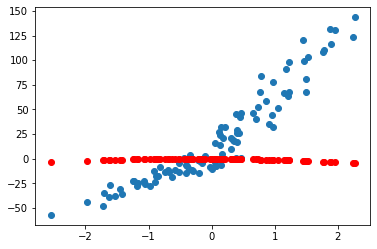

In [8]:
plt.scatter(x, y)
plt.scatter(x, model(X, theta), c='r')

In [9]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [10]:
cost_function(X, y, theta)

1328.6654828872622

In [11]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [12]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # creation of table to store the evolution of cout model 
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # update of the parametre theta (formula of gradient descent)
        cost_history[i] = cost_function(X, y, theta) # we save the valeur of i in cost_history[i]
        
    return theta, cost_history

In [13]:
n_iterations = 1000
learning_rate = 0.01

theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)


In [14]:
theta_final 

array([[ 8.60077615],
       [42.23116732],
       [ 8.18143081]])

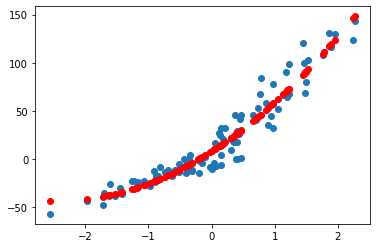

In [16]:
# création of vector prédictions which has a prédictions of  final model 
predictions = model(X, theta_final)

# print the result rouge for our rapport and  Dataset in bleu)
plt.scatter(x, y)
plt.scatter(x, predictions, c='r')

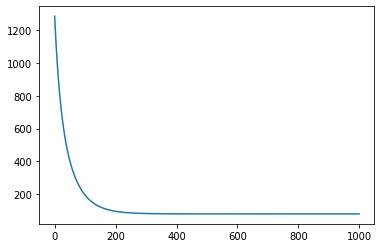

In [17]:
plt.plot(range(n_iterations), cost_history)


In [18]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [19]:
coef_determination(y, predictions)


0.9287186469389942

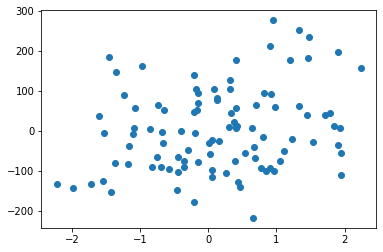

In [20]:
np.random.seed(0) # permet de reproduire l'aléatoire

x, y = make_regression(n_samples=100, n_features=2, noise = 10) # creation d'un dataset (x, y) linéaire

plt.scatter(x[:,0], y) # afficher les résultats. x_1 en abscisse et y en ordonnée

In [31]:
from mpl_toolkits.mplot3d import Axes3D
#from matplotlib import pyplot as plt
#%matplotlib notebook #activez cette ligne pour manipuler le graph 3D

ax = fig.add_subplot(111, projection='3d')
#ax = fig.add_subplot(111, projection='3d')

#ax = fig.add_subplot(1, 2, 2, projection='3d')


ax.scatter(x[:,0], x[:,1], y) # affiche en 3D la variable x_1, x_2, et la target y

# affiche les noms des axes
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('y')

Text(0.5, 0, 'y')

In [32]:
# Verification des dimensions
print(x.shape)
print(y.shape)

# redimensionner y
y = y.reshape(y.shape[0], 1)
print(y.shape)

(100, 2)
(100, 1)
(100, 1)


In [24]:
# Création de la matrice X, inclut le Biais
X = np.hstack((x, np.ones((x.shape[0], 1)))) # ajoute un vecteur Biais de dimension (x.shape[0], 1)

print(X.shape)
print(X[:10])

(100, 3)
[[ 1.05445173 -1.07075262  1.        ]
 [-0.36274117 -0.63432209  1.        ]
 [-0.85409574  0.3130677   1.        ]
 [ 1.3263859   0.29823817  1.        ]
 [-0.4615846  -1.31590741  1.        ]
 [ 1.94362119 -1.17312341  1.        ]
 [-1.60205766  0.62523145  1.        ]
 [-0.40178094  0.17742614  1.        ]
 [-0.97727788  1.86755799  1.        ]
 [ 0.37816252  0.15494743  1.        ]]


In [25]:
n_iterations = 1000
learning_rate = 0.01

theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

In [26]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)

theta_final

array([[28.67154299],
       [97.29521689],
       [-0.5114807 ]])

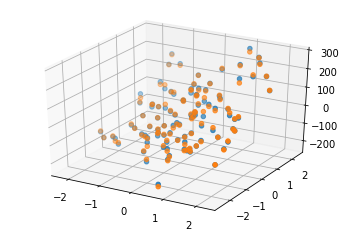

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:,0], x[:,1], y)
ax.scatter(x[:,0], x[:,1], predictions)

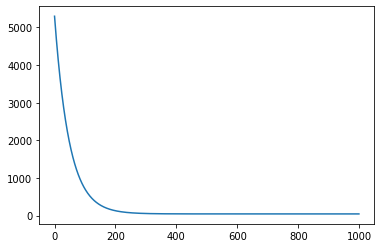

In [28]:
plt.plot(range(n_iterations), cost_history)


In [29]:
coef_determination(y, predictions)

0.9916687122072254